# Description

This notebook executes Part 2 of total amphora comparative morphological analysis: outlier removal. It takes you through the following steps: (1) checking your files, (2) inputting the items you want to analyze, (3) running cloud-to-cloud distance comparison, and (4) visualizing and saving your results, including high-quality figures for publication.

Full jar comparative morphological analysis:
- visualization of the average point-to-point distance between the two model point clouds across all amphoras of the dataset
- optionally save all point-to-point distances as a csv file to avoid repeating this computation
 
# I/O
**Inputs:**
 - comma-separated value (.csv) file for each reference and compared amphora model

**Outputs:**
 - csv files storing all point-to-point distances distance between each pare of compared amphoras
 - a visualization of the distribution of these average distances across the set of amphoras
 
## Sample Dataset
 
The amphoras in this sample dataset are from the Yassiada shipwreck in Turkey

#### Edit a block of code if and only if you see "USER INPUT NEEDED!" above that block of code.

# Step 1: Check your files

#### Your project directory should contain these components, organized in this way:

```
my_total_comparison_project (a folder)
- total_comparison_part_2_analysis.ipynb (this notebook file)
- clean_csv
    - 83-2.csv (csv files of 83-2's coordinates, all outliers excluded)
    - 84-3.csv (csv files of 84-23's coordinates, all outliers excluded)
    - etc. for every jar
- phys_data.csv (a file containing physical data -- max_diam, body_height, group -- measured in-person)
```

No longer needed for Part 2 analysis, but leave them this same folder for future reference:
- models (folder used in Part 1)
- total_comparison_part_1_remove_outliers.ipynb


# Step 2: List the items you want to analyze

Identify the amphora you want to use as a reference. List the IDs of the amphoras you want to compare with the reference amphora.
#### USER INPUT NEEDED!

In [40]:
ref = 'Y114'
compare = ['83-2',
          '84-3',
          '84-10',
          '86-75',
          '86-85',
          '86-92',
          '86-93',
          '86-95',
          '86-99',
          '86-100',
          '86-107',
          '86-110',
          '86-113',
          '86-117',
          '86-120',
          'UN16',
          'W43',
          'W55',
          'Y7',
          'Y11',
          'Y14',
          'Y15',
          'Y22',
          'Y28',
          'Y32',
          'Y39',
          'Y45',
          'Y123',
          'Y126',
          'Y127',
          'Y128']

# Step 3: Run cloud-to-cloud distance comparison

Run the cell below to set whether or not to save csv files of nearest-neighbor distances between objects.

In [41]:
save_distances = True       # set True if these files do not yet exist, else False.

Run the cells below to calculate the mean distance from each point in the comparison model to the nearest neighbor in the reference model.

In [42]:
import csv, os, sys
sys.path.insert(0,'../../code')
import comp
import matplotlib.pyplot as plt
import numpy as np
from itertools import izip
%matplotlib inline

In [43]:
average_distances = []
stdev_distances = []
for model in compare:
    
    print(model) # so the user can see which segment the code is working on
    
    ref_csv_path = './clean_csv/%s.csv' % ref
    model_csv_path = './clean_csv/%s.csv' % model
    dist_filepath = './distances/%s_%s_distances.csv' % (ref, model)
    
    average_distance, stdev_distance = comp.get_avg_cc_dist(ref_csv_path, model_csv_path, save_distances, dist_filename)
    
    average_distances.append(average_distance)
    stdev_distances.append(stdev_distance)

83-2
84-3
84-10
86-75
86-85
86-92
86-93
86-95
86-99
86-100
86-107
86-110
86-113
86-117
86-120
UN16
W43
W55
Y7
Y11
Y14
Y15
Y22
Y28
Y32
Y39
Y45
Y123
Y126
Y127
Y128


^ Each of these are status messages, which print while the program is running when the corresponding model is being compared with the reference.

Run the cell below to create an empty folder called "results".

In [44]:
if not os.path.exists('results'):
    os.mkdir('results')

Run the cell below if you want to save the average and stdev distance data for each pair in a comma-separated value (CSV) file.

In [45]:
with open('./results/distances_to_%s.csv' % ref, 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(izip(compare, average_distances, stdev_distances))

# Step 4: Visualize morphological difference across the dataset

## Customize figures

Adjust the parameters in the cell below to customize the look of this figure. Run the cell to set the parameters.

*Tip: https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3 is a great place to look for colors that are colorblind safe, print friendly, and photocopy safe.*

In [46]:
figure_width = 15
figure_height = 6
dist_color = '#412100'   # set color for bars representing nearest neighbor distance
diam_color = '#d2c295'   # set color for bars representing maximum diameter
bodh_color = '#928b81'   # set color for bars representing body height
resolution_dpi = 600     # set resolution of saved figures in dots per inch

## Visualize morphological difference

Run the cell below to visualize the morphological differences between the reference amphora and the comparison amphoras as a bar chart.

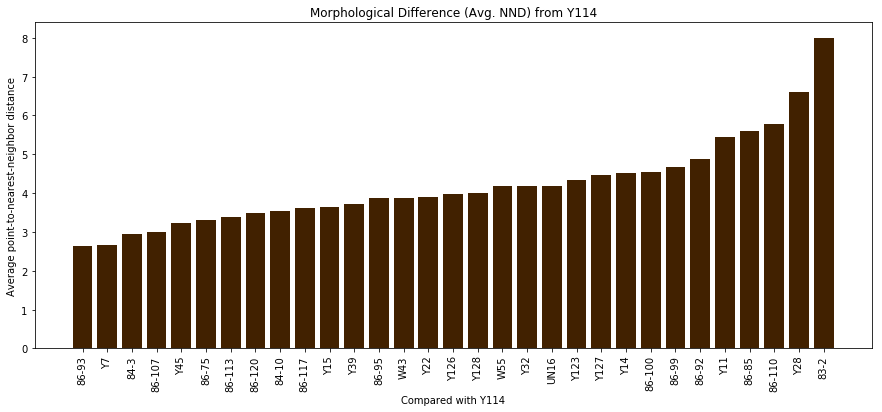

In [31]:
# order the compared amphoras by avg NND to ref amphora
compare_sorted = [x for _,x in sorted(zip(average_distances, compare))]
average_distances_sorted = sorted(average_distances)

fig, ax = plt.subplots(figsize = (figure_width, figure_height))
x_pos = np.arange(len(compare_sorted))
ax.bar(x_pos, average_distances_sorted, color=dist_color)
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_xlabel('Compared with %s' % ref)
ax.set_ylabel('Average point-to-nearest-neighbor distance')
ax.set_title('Morphological Difference (Avg. NND) from %s' % ref)
plt.xticks(rotation='vertical')
plt.savefig('./results/Morphological Difference (Avg. NND) from %s.png' % ref, dpi=resolution_dpi)
plt.show()

** Import pertinent data physically measured. **

In [34]:
import pandas as pd
phys_data = pd.read_csv('phys_data.csv', index_col=0)
print(phys_data)

        max_diam  body_height                       group
tag                                                      
83-2        40.7         38.9  Spiral combed - main group
84-3        42.0         41.3  Spiral combed - main group
84-10       41.8         40.9  Spiral combed - main group
86-75       41.8         41.4  Spiral combed - main group
86-85       41.3         39.0  Spiral combed - main group
86-92       40.9         41.2  Spiral combed - main group
86-93       42.3         41.3  Spiral combed - main group
86-95       43.0         41.5  Spiral combed - main group
86-99       41.1         42.1  Spiral combed - main group
86-100      41.4         43.1  Spiral combed - main group
86-107      41.9         42.2  Spiral combed - main group
86-110      43.9         43.2  Spiral combed - main group
86-113      42.0         42.2  Spiral combed - main group
86-117      42.8         42.3  Spiral combed - main group
86-120      41.8         42.4  Spiral combed - main group
UN16        42

## Visualize morphological difference compared with other physical quantities across the dataset

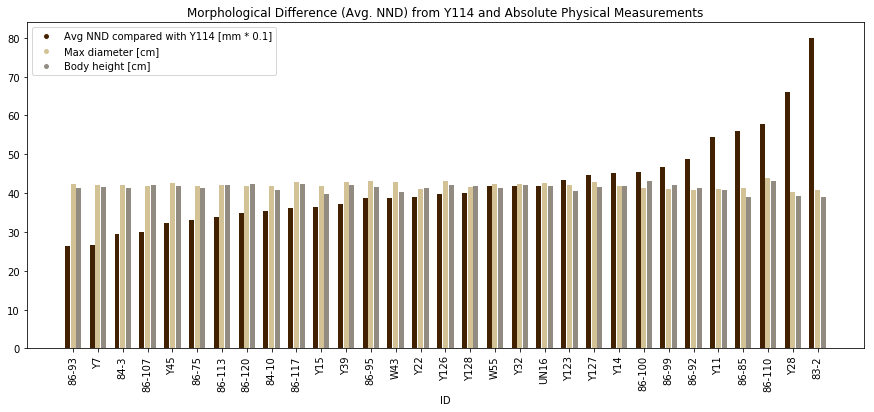

In [35]:
from matplotlib.lines import Line2D

phys_data_comp = phys_data.drop([ref])

max_diam = list(phys_data_comp['max_diam'])
body_height = list(phys_data_comp['body_height'])

max_diam_sorted = [x for _,x in sorted(zip(average_distances, max_diam))]
body_height_sorted = [x for _,x in sorted(zip(average_distances, body_height))]

fig, ax = plt.subplots(figsize=(figure_width, figure_height))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

colors = [diam_color, bodh_color]

ax.bar(x_pos-w-s, [x*10 for x in average_distances_sorted], width=w, color=dist_color, align='center')
ax.bar(x_pos, max_diam_sorted, width=w, color=diam_color, align='center')
ax.bar(x_pos+w+s, body_height_sorted, width=w, color=bodh_color, align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor=dist_color, label='Avg NND compared with %s [mm * 0.1]' % ref),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=diam_color, label='Max diameter [cm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=bodh_color, label='Body height [cm]')]
plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (Avg. NND) from %s and Absolute Physical Measurements' % ref)
plt.xticks(rotation='vertical')
plt.savefig('./results/Morphological Difference (Avg. NND) from %s and Absolute Physical Measurements.png' % ref, dpi=resolution_dpi)
plt.show()

## Visualize morphological difference along with differences in physical metrics

Measurement difference is the positive difference between the measurement for the comparison jar and the measurement for the reference jar. 

In [36]:
row_ref = phys_data.loc[ref]

max_diam_sorted_diff_with_ref = [abs(x-row_ref.loc['max_diam']) for x in max_diam_sorted]
body_height_sorted_diff_with_ref = [abs(x-row_ref.loc['body_height']) for x in body_height_sorted]

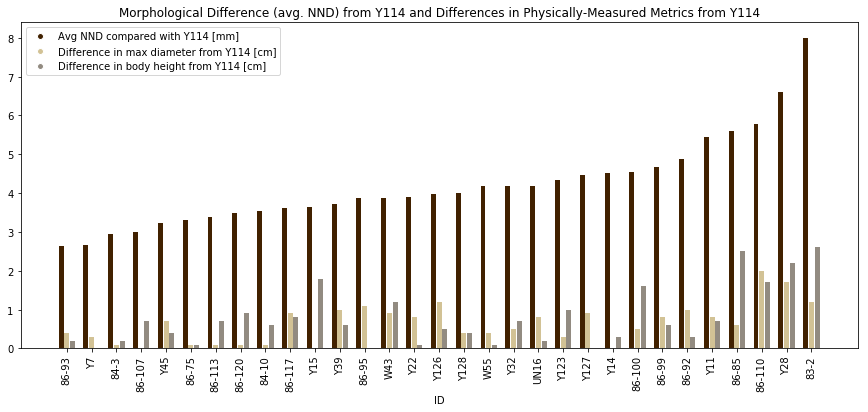

In [38]:
fig, ax = plt.subplots(figsize=(figure_width, figure_height))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

colors = []

ax.bar(x_pos-w-s, average_distances_sorted,width=w, color=dist_color,align='center')
ax.bar(x_pos, max_diam_sorted_diff_with_ref,width=w, color=diam_color,align='center')
ax.bar(x_pos+w+s, body_height_sorted_diff_with_ref,width=w, color=bodh_color,align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor=dist_color, label='Avg NND compared with %s [mm]' % ref),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=diam_color, label='Difference in max diameter from %s [cm]' % ref),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=bodh_color, label='Difference in body height from %s [cm]' % ref)]

plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (avg. NND) from %s and Differences in Physically-Measured Metrics from %s'  % (ref, ref))
plt.xticks(rotation='vertical')
plt.savefig('./results/Morphological Difference from %s and Differences in Physically-Measured Metrics from %s'  % (ref, ref), dpi=resolution_dpi)
plt.show()

## Characterize the dataset as a whole

In [39]:
metrics_abs = [max_diam_sorted,
          body_height_sorted]

metrics_diff = [max_diam_sorted_diff_with_ref,
          body_height_sorted_diff_with_ref]

metric_names = ['max diam [cm]', 'body ht [cm]']

print 'Physical metrics, absolute\n\n\t\t%s\t\t%s\t\t%s\n' % ('mean', 'stdev', 'cv')
for metric, name in zip(metrics_abs, metric_names):
    print '%s\t%f\t%f\t%f' % (name, np.mean(metric), np.std(metric), np.mean(metric)/np.std(metric))

print '\nPhysical metrics, difference from %s\n\n\t\t%s\t\t%s\t\t%s\n' % (ref, 'mean', 'stdev', 'cv')
for metric, name in zip(metrics_diff, metric_names):
    print '%s\t%f\t%f\t%f' % (name, np.mean(metric), np.std(metric), np.mean(metric)/np.std(metric))
    
print '\nMorphological difference from %s\n\n\t\t%s\t\t%s\t\t%s\n' % (ref, 'mean', 'stdev', 'cv')
name = 'NND [mm]'
metric = average_distances_sorted
print '%s\t%f\t%f\t%f' % (name, np.mean(metric), np.std(metric), np.mean(metric)/np.std(metric))

Physical metrics, absolute

		mean		stdev		cv

max diam [cm]	42.012903	0.795853	52.789782
body ht [cm]	41.387097	1.046882	39.533668

Physical metrics, difference from Y114

		mean		stdev		cv

max diam [cm]	0.635484	0.492229	1.291033
body ht [cm]	0.764516	0.724034	1.055912

Morphological difference from Y114

		mean		stdev		cv

NND [mm]	4.200118	1.129236	3.719435
